<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-1---Exploring-Tick,-Volume,-DV-Bars" data-toc-modified-id="Chapter-1---Exploring-Tick,-Volume,-DV-Bars-1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 1 - Exploring Tick, Volume, DV Bars</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Read-and-Clean-Data" data-toc-modified-id="Read-and-Clean-Data-1.2" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read and Clean Data</a></span></li><li><span><a href="#Remove-Obvious-Price-Errors-in-Tick-Data" data-toc-modified-id="Remove-Obvious-Price-Errors-in-Tick-Data-1.3" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Remove Obvious Price Errors in Tick Data</a></span></li></ul></li><li><span><a href="#Tick-Bars" data-toc-modified-id="Tick-Bars-2" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tick Bars</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Bonus-Exercise:-Make-OHLC-Bars-from-Custom-Bars" data-toc-modified-id="Bonus-Exercise:-Make-OHLC-Bars-from-Custom-Bars-2.0.1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Bonus Exercise: Make OHLC Bars from Custom Bars</a></span></li></ul></li></ul></li><li><span><a href="#Volume-Bars" data-toc-modified-id="Volume-Bars-3" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">3&nbsp;&nbsp;</span>Volume Bars</a></span></li><li><span><a href="#Dollar-Value-Bars" data-toc-modified-id="Dollar-Value-Bars-4" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dollar Value Bars</a></span></li><li><span><a href="#Analyzing-the-Bars" data-toc-modified-id="Analyzing-the-Bars-5" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyzing the Bars</a></span><ul class="toc-item"><li><span><a href="#Count-Quantity-of-Bars-By-Each-Bar-Type-(Weekly)" data-toc-modified-id="Count-Quantity-of-Bars-By-Each-Bar-Type-(Weekly)-5.1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Count Quantity of Bars By Each Bar Type (Weekly)</a></span></li><li><span><a href="#Which-Bar-Type-Has-Most-Stable-Counts?" data-toc-modified-id="Which-Bar-Type-Has-Most-Stable-Counts?-5.2" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Which Bar Type Has Most Stable Counts?</a></span></li><li><span><a href="#Which-Bar-Type-Has-the-Lowest-Serial-Correlation?" data-toc-modified-id="Which-Bar-Type-Has-the-Lowest-Serial-Correlation?-5.3" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Which Bar Type Has the Lowest Serial Correlation?</a></span></li><li><span><a href="#Partition-Bar-Series-into-Monthly,-Compute-Variance-of-Returns,-and-Variance-of-Variance" data-toc-modified-id="Partition-Bar-Series-into-Monthly,-Compute-Variance-of-Returns,-and-Variance-of-Variance-5.4" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Partition Bar Series into Monthly, Compute Variance of Returns, and Variance of Variance</a></span></li><li><span><a href="#Compute-Jarque-Bera-Test,-Which-Has-Lowest-Test-Statistic?" data-toc-modified-id="Compute-Jarque-Bera-Test,-Which-Has-Lowest-Test-Statistic?-5.5" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Compute Jarque-Bera Test, Which Has Lowest Test Statistic?</a></span></li><li><span><a href="#Compute-Shapiro-Wilk-Test" data-toc-modified-id="Compute-Shapiro-Wilk-Test-5.6" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Compute Shapiro-Wilk Test</a></span></li></ul></li><li><span><a href="#Compare-Serial-Correlation-between-Dollar-and-Dollar-Imbalance-Bars" data-toc-modified-id="Compare-Serial-Correlation-between-Dollar-and-Dollar-Imbalance-Bars-6" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare Serial Correlation between Dollar and Dollar Imbalance Bars</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Update-[05.04.18]" data-toc-modified-id="Update-[05.04.18]-6.0.1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Update [05.04.18]</a></span></li></ul></li></ul></li></ul></div>

Advances in Machine Learning

# Chapter 1 - Exploring Tick, Volume, DV Bars

In [4]:
%load_ext watermark
%watermark

%load_ext autoreload
%autoreload 2
# import standard libs
from IPython.display import display
#from IPython.core.debugger import set_trace as bp
from pathlib import PurePath, Path
import sys
import time
from collections import OrderedDict as od
import re
import os
import json
os.environ['THEANO_FLAGS'] = 'device=cpu,floatX=float32'

# import python scientific stack
import pandas as pd
#import pandas_datareader.data as web
pd.set_option('display.max_rows', 100)
#from dask import dataframe as dd
#from dask.diagnostics import ProgressBar
#pbar = ProgressBar()
#pbar.register()
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from numba import jit
import math
import pymc3 as pm
from theano import shared, theano as tt

# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')

#plt.rcParams['font.family'] = 'DejaVu Sans Mono'
#plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
#plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

# import util libs
#import pyarrow as pa
#import pyarrow.parquet as pq
from tqdm import tqdm, tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
#import missingno as msno

# from src.utils.utils import *
# from src.features.bars import get_imbalance
# import src.features.bars as brs
# import src.features.snippets as snp

RANDOM_STATE = 777

print()
#%watermark -p pandas,pandas_datareader,dask,numpy,pymc3,theano,sklearn,statsmodels,scipy,matplotlib,seaborn,pyarrow,fastparquet

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2019-10-12T13:57:48+08:00

CPython 3.7.4
IPython 7.8.0

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
CPU cores  : 4
interpreter: 64bit
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'numba'

In [11]:
!pip install pymc3 theano seaborn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/a1/6b/7f62017e3f0b32438dd90bdc1ff0b7b1448b6cb04a1ed84f37b6de95cd7b/h5py-2.10.0-cp37-cp37m-win_amd64.whl
  Created wheel for theano: filename=Theano-1.0.4-cp37-none-any.whl size=2667193 sha256=20a85dea99e5fe1a01cd1b5132d04e59c499d4e49c78ec81bd3b0ed266d6be42
  Stored in directory: C:\Users\HansonMei\AppData\Local\pip\Cache\wheels\ce\24\79\99058fcca3b6b710600f109d0b7c71904c9a1d31197c1f31c9
Successfully built theano


## Introduction

This notebook explores the idea of sampling prices as a function of something other than fixed time intervals. For example using the number of ticks, volume or dollar volume traded as the sampling interval. The rest of this notebook works through some of the exercises found in chapters 1 and 2 of the book. 

This notebook makes use of the following script found here: `./src/features/bars.py`

## Read and Clean Data

The data set used in this example is too large to be hosted on github. It is a sample of equity tick data, symbol `IVE`, provided by [kibot.com (caution: download link)](http://api.kibot.com/?action=history&symbol=IVE&interval=tickbidask&bp=1&user=guest). Download this data to the `./data/raw/` directory in your local repo.

In [2]:
def cprint(df):
    if not isinstance(df, (pd.DataFrame)):
        try:
            df = df.to_frame()
        except:
            raise ValueError('object cannot be coerced to df')

    print('-'*79)
    print('dataframe information')
    print('-'*79)
    print(df.tail(5))
    print('-'*50)
    print(df.info())
    print('-'*79)
    print()

get_range = lambda df, col: (df[col].min(), df[col].max())

In [3]:
def read_kibot_ticks(fp):
    # read tick data from http://www.kibot.com/support.aspx#data_format
    cols = list(map(str.lower,['Date','Time','Price','Bid','Ask','Size']))
    df = (pd.read_csv(fp, header=None)
          .rename(columns=dict(zip(range(len(cols)),cols)))
          .assign(dates=lambda df: (pd.to_datetime(df['date']+df['time'],
                                                  format='%m/%d/%Y%H:%M:%S')))
          .assign(v=lambda df: df['size']) # volume
          .assign(dv=lambda df: df['price']*df['size']) # dollar volume
          .drop(['date','time'],axis=1)
          .set_index('dates')
          .drop_duplicates())
    return df

data_dir = '/Users/Lina/Documents/project/Adv_Fin_ML_Exercises/data'   
#infp = PurePath(data_dir/'raw'/'IVE_tickbidask.txt')
infp = PurePath(data_dir+'/raw/IVE_tickbidask.txt')
df = read_kibot_ticks(infp)
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask  size     v        dv
dates                                                            
2019-10-10 15:59:59  117.41  117.39  117.41   300   300   35223.0
2019-10-10 15:59:59  117.40  117.40  117.44   100   100   11740.0
2019-10-10 16:00:00  117.40  117.40  117.46  4228  4228  496367.2
2019-10-10 16:10:00  117.40  116.96  118.49     0     0       0.0
2019-10-10 18:30:00  117.40  115.60  119.36     0     0       0.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1668660 entries, 2009-09-28 09:30:00 to 2019-10-10 18:30:00
Data columns (total 6 columns):
price    1668660 non-null float64
bid      1668660 non-null float64
ask      1668660 non-null float64
size     1668660 non-null int64
v        1668660 non-null 

Save initial processed data as parquet in the `./data/interim/` folder and reload.

In [28]:
df.shape

(1668660, 6)

In [29]:
df.head()

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00


In [3]:
outfp = PurePath(data_dir/'interim'/'IVE_tickbidask.parq')
df.to_parquet(outfp)

In [4]:
infp=PurePath(data_dir/'interim'/'IVE_tickbidask.parq')
df = pd.read_parquet(infp)
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask    size       v          dv
dates                                                                  
2018-02-26 15:59:59  115.35  115.34  115.36     700     700     80745.0
2018-02-26 16:00:00  115.35  115.34  115.35    5362    5362    618506.7
2018-02-26 16:10:00  115.35  115.22  115.58       0       0         0.0
2018-02-26 16:16:14  115.30  114.72  115.62  778677  778677  89781458.1
2018-02-26 18:30:00  115.35  114.72  117.38       0       0         0.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293589 entries, 2009-09-28 09:30:00 to 2018-02-26 18:30:00
Data columns (total 6 columns):
price    1293589 non-null float64
bid      1293589 non-null float64
ask      1293589 non-null float64
size     1293589

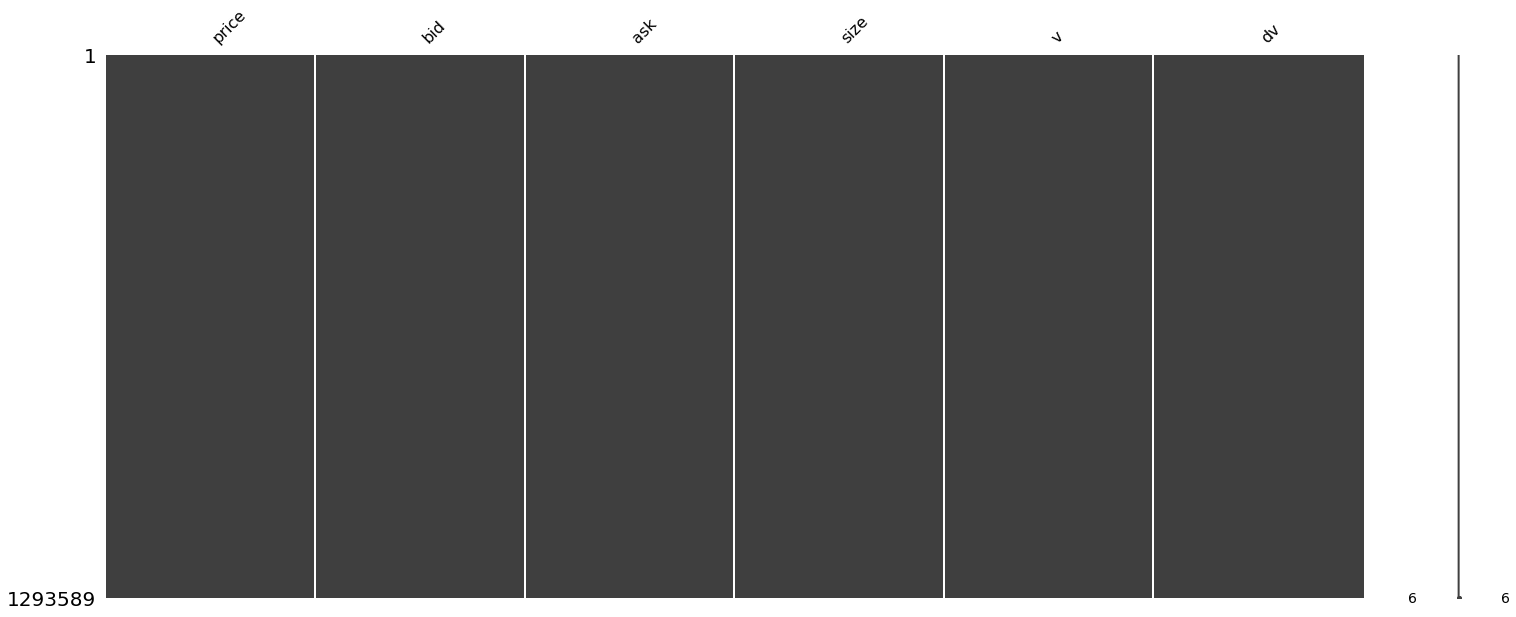

In [5]:
msno.matrix(df)

## Remove Obvious Price Errors in Tick Data

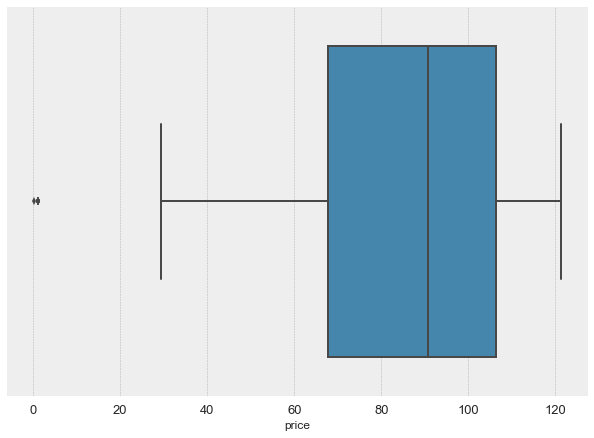

In [27]:
sns.boxplot(df.price)

In [7]:
@jit(nopython=True)
def mad_outlier(y, thresh=3.):
    '''
    compute outliers based on mad
    # args
        y: assumed to be array with shape (N,1)
        thresh: float()
    # returns
        array index of outliers
    '''
    median = np.median(y)
    diff = np.sum((y - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [8]:
mad = mad_outlier(df.price.values.reshape(-1,1))

In [9]:
df.loc[mad]

,price,bid,ask,size,v,dv
dates,,,,,,
2010-05-06 14:49:07,0.11,0.10,44.03,500,500,55.0
2010-05-06 14:53:30,1.10,1.10,30.28,2600,2600,2860.0
2010-05-06 14:55:32,1.10,1.10,50.57,300,300,330.0
2010-05-06 14:55:32,1.10,1.10,50.57,100,100,110.0
2010-05-06 14:55:32,1.10,1.00,50.57,200,200,220.0
2010-05-06 14:55:32,1.10,1.00,50.57,700,700,770.0
2010-05-06 14:55:32,1.10,1.00,50.57,1200,1200,1320.0
2010-05-06 14:55:32,1.10,0.55,50.57,500,500,550.0
2010-05-06 14:55:32,1.10,0.55,50.57,100,100,110.0


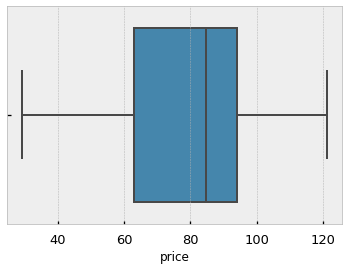

In [10]:
sns.boxplot(df.loc[~mad].price)

Drop outliers from dataset and save cleaned data in the `./data/processed/` folder.

In [11]:
df = df.loc[~mad]
cprint(df)

outfp = PurePath(data_dir/'processed'/'clean_IVE_fut_prices.parq')
df.to_parquet(outfp)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask    size       v          dv
dates                                                                  
2018-02-26 15:59:59  115.35  115.34  115.36     700     700     80745.0
2018-02-26 16:00:00  115.35  115.34  115.35    5362    5362    618506.7
2018-02-26 16:10:00  115.35  115.22  115.58       0       0         0.0
2018-02-26 16:16:14  115.30  114.72  115.62  778677  778677  89781458.1
2018-02-26 18:30:00  115.35  114.72  117.38       0       0         0.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293578 entries, 2009-09-28 09:30:00 to 2018-02-26 18:30:00
Data columns (total 6 columns):
price    1293578 non-null float64
bid      1293578 non-null float64
ask      1293578 non-null float64
size     1293578

In [12]:
infp=PurePath(data_dir/'processed'/'clean_IVE_fut_prices.parq')
df = pd.read_parquet(infp)
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask    size       v          dv
dates                                                                  
2018-02-26 15:59:59  115.35  115.34  115.36     700     700     80745.0
2018-02-26 16:00:00  115.35  115.34  115.35    5362    5362    618506.7
2018-02-26 16:10:00  115.35  115.22  115.58       0       0         0.0
2018-02-26 16:16:14  115.30  114.72  115.62  778677  778677  89781458.1
2018-02-26 18:30:00  115.35  114.72  117.38       0       0         0.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293578 entries, 2009-09-28 09:30:00 to 2018-02-26 18:30:00
Data columns (total 6 columns):
price    1293578 non-null float64
bid      1293578 non-null float64
ask      1293578 non-null float64
size     1293578

# Tick Bars

In [13]:
def tick_bars(df, price_column, m):
    '''
    compute tick bars

    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for ticks
    # returns
        idx: list of indices
    '''
    t = df[price_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += 1
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def tick_bar_df(df, price_column, m):
    idx = tick_bars(df, price_column, m)
    return df.iloc[idx].drop_duplicates()

There are many ways to choose `M`, or the threshold value for sampling prices. One way is based on ratios of total dollar value/volume traded vs number of ticks. The rest of the notebook uses an arbitrary but sensible `M` value. I leave it as an exercise for the reader to see how the results change based on different values of `M`.

In [14]:
n_ticks = df.shape[0]
volume_ratio = (df.v.sum()/n_ticks).round()
dollar_ratio = (df.dv.sum()/n_ticks).round()
print(f'num ticks: {n_ticks:,}')
print(f'volume ratio: {volume_ratio}')
print(f'dollar ratio: {dollar_ratio}')

num ticks: 1,293,578
volume ratio: 536.0
dollar ratio: 43767.0


In [15]:
tick_M = 100 # arbitrary
print(f'tick threshold: {tick_M:,}')
tidx = tick_bars(df, 'price', tick_M)
tidx[:10]

 16%|█▌        | 201521/1293578 [00:00<00:00, 2014779.60it/s]

tick threshold: 100


100%|██████████| 1293578/1293578 [00:00<00:00, 2701348.96it/s]


[99, 199, 299, 399, 499, 599, 699, 799, 899, 999]

In [16]:
df.iloc[tidx].shape, df.shape

((12935, 6), (1293578, 6))

Dataset is large so select smaller example for quick exploration

In [17]:
tick_df = tick_bar_df(df, 'price', tick_M)
tick_df.shape

100%|██████████| 1293578/1293578 [00:00<00:00, 2596507.45it/s]


(12935, 6)

In [18]:
def select_sample_data(ref, sub, price_col, date):
    '''
    select a sample of data based on date, assumes datetimeindex
    
    # args
        ref: pd.DataFrame containing all ticks
        sub: subordinated pd.DataFrame of prices
        price_col: str(), price column
        date: str(), date to select
    # returns
        xdf: ref pd.Series
        xtdf: subordinated pd.Series
    '''
    xdf = ref[price_col].loc[date]
    xtdf = sub[price_col].loc[date]
    return xdf, xtdf

## try different dates to see how the quantity of tick bars changes
xDate ='2009-10-01' #'2017-10-4'
xdf, xtdf = select_sample_data(df, tick_df, 'price', xDate)

xdf.shape, xtdf.shape

((1466,), (15,))

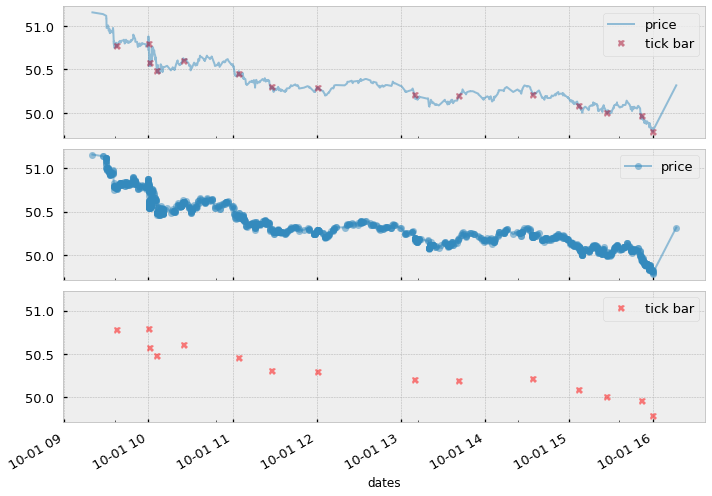

In [19]:
def plot_sample_data(ref, sub, bar_type, *args, **kwds):
    f,axes=plt.subplots(3,sharex=True, sharey=True, figsize=(10,7))
    ref.plot(*args, **kwds, ax=axes[0], label='price')
    sub.plot(*args, **kwds, ax=axes[0], marker='X', ls='', label=bar_type)
    axes[0].legend();
    
    ref.plot(*args, **kwds, ax=axes[1], label='price', marker='o')
    sub.plot(*args, **kwds, ax=axes[2], ls='', marker='X',
             color='r', label=bar_type)

    for ax in axes[1:]: ax.legend()
    plt.tight_layout()
    
    return

plot_sample_data(xdf, xtdf, 'tick bar', alpha=0.5, markersize=7)

### Bonus Exercise: Make OHLC Bars from Custom Bars

Extract `tick_df.price` and `df.price` into two pandas series.

In [20]:
sub = tick_df.price
ref = df.price

The function below creates the OHLC dataframe by:
    1. Iterating over the subordinated series' index extracting idx and idx+1 period
    2. Selecting the same date period from the reference series
    3. Extracting the max, min prices from the reference series.
    4. Combining the o,h,l,c and start and end timestamps into a row
    5. Returning the aggregated rows as a pandas dataframe.

In [21]:
def get_ohlc(ref, sub):
    '''
    fn: get ohlc from custom bars
    
    # args
        ref : reference pandas series with all prices
        sub : custom tick pandas series
    # returns
        tick_df : dataframe with ohlc values
    '''
    ohlc = []
    for i in tqdm(range(sub.index.shape[0]-1)):
        start,end = sub.index[i], sub.index[i+1]
        tmp_ref = ref.loc[start:end]
        max_px, min_px = tmp_ref.max(), tmp_ref.min()
        o,h,l,c = sub.iloc[i], max_px, min_px, sub.iloc[i+1]
        ohlc.append((end,start,o,h,l,c))
    cols = ['end','start','open','high','low','close']
    return (pd.DataFrame(ohlc,columns=cols))

## uncomment below to run (takes about 5-6 mins on my machine)
#tick_bars_ohlc = get_ohlc(ref, sub)
#cprint(tick_bars_ohlc)

#outfp = PurePath(data_dir/'processed'/'tick_bars_ohlc.parq')
#tick_bars_ohlc.to_parquet(outfp)

# Volume Bars

In [4]:
import pdb

In [7]:
def volume_bars(df, volume_column, m):
    '''
    compute volume bars

    # args
        df: pd.DataFrame()
        volume_column: name for volume data
        m: int(), threshold value for volume
    # returns
        idx: list of indices
    '''
    t = df[volume_column]
    ts = 0
    idx = []
    #pdb.set_trace()
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def volume_bar_df(df, volume_column, m):
    idx = volume_bars(df, volume_column, m)
    return df.iloc[idx].drop_duplicates()

In [8]:
volume_M =  10_000 # arbitrary 
print(f'volume threshold: {volume_M:,}')
v_bar_df = volume_bar_df(df, 'v', volume_M)
cprint(v_bar_df)


  7%|▋         | 123291/1668660 [00:00<00:01, 1232899.42it/s]

volume threshold: 10,000



100%|██████████| 1668660/1668660 [00:01<00:00, 1542744.54it/s]


-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                       price     bid     ask  size     v        dv
dates                                                             
2019-10-10 15:51:54  117.510  117.51  117.52   900   900  105759.0
2019-10-10 15:55:00  117.440  117.44  117.45  1200  1200  140928.0
2019-10-10 15:57:30  117.422  117.42  117.43   350   350   41097.7
2019-10-10 15:59:59  117.400  117.38  117.40  2600  2600  305240.0
2019-10-10 15:59:59  117.410  117.39  117.41  2600  2600  305266.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70249 entries, 2009-09-28 09:44:09 to 2019-10-10 15:59:59
Data columns (total 6 columns):
price    70249 non-null float64
bid      70249 non-null float64
ask      70249 non-null float64
size     70249 non-null int64
v        70249 non-null int64

In [23]:
volume_M =  10_000 # arbitrary 
print(f'volume threshold: {volume_M:,}')
v_bar_df = volume_bar_df(df, 'v', 'price', volume_M)
cprint(v_bar_df)

 10%|█         | 134661/1293578 [00:00<00:00, 1346315.98it/s]

volume threshold: 10,000


100%|██████████| 1293578/1293578 [00:00<00:00, 2407460.21it/s]

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask    size       v           dv
dates                                                                   
2018-02-26 15:49:42  115.20  115.17  115.18     800     800     92160.00
2018-02-26 15:49:42  115.25  115.17  115.18   23923   23923   2757125.75
2018-02-26 15:58:15  115.24  115.24  115.25    3900    3900    449436.00
2018-02-26 16:00:00  115.35  115.34  115.35    5362    5362    618506.70
2018-02-26 16:16:14  115.30  114.72  115.62  778677  778677  89781458.10
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54903 entries, 2009-09-28 09:44:09 to 2018-02-26 16:16:14
Data columns (total 6 columns):
price    54903 non-null float64
bid      54903 non-null float64
ask      54903 non-null float64
size     54903 no

xdf shape: (1466,), xtdf shape: (48,)


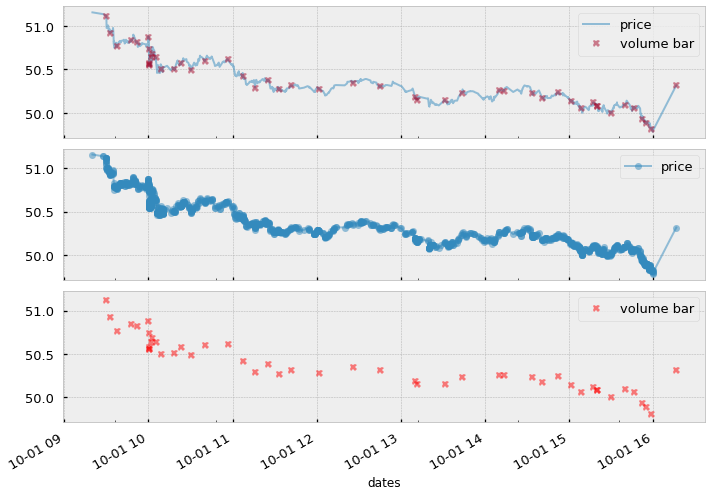

In [24]:
xDate = '2009-10-1'
xdf, xtdf = select_sample_data(df, v_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

plot_sample_data(xdf, xtdf, 'volume bar', alpha=0.5, markersize=7)  

# Dollar Value Bars

In [25]:
def dollar_bars(df, dv_column, m):
    '''
    compute dollar bars

    # args
        df: pd.DataFrame()
        dv_column: name for dollar volume data
        m: int(), threshold value for dollars
    # returns
        idx: list of indices
    '''
    t = df[column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def dollar_bar_df(df, dv_column, m):
    idx = dollar_bars(df, dv_column, m)
    return df.iloc[idx].drop_duplicates()

In [26]:
dollar_M = 1_000_000 # arbitrary 
print(f'dollar threshold: {dollar_M:,}')
dv_bar_df = dollar_bar_df(df, 'dv', 'price', dollar_M)
cprint(dv_bar_df)

 14%|█▎        | 176990/1293578 [00:00<00:00, 1769593.70it/s]

dollar threshold: 1,000,000


100%|██████████| 1293578/1293578 [00:00<00:00, 2426948.50it/s]

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                        price     bid     ask    size       v            dv
dates                                                                      
2018-02-26 15:42:24  115.3199  115.31  115.32     290     290  3.344277e+04
2018-02-26 15:49:42  115.2500  115.17  115.18   23923   23923  2.757126e+06
2018-02-26 15:58:15  115.2400  115.24  115.25    3900    3900  4.494360e+05
2018-02-26 16:00:00  115.3500  115.34  115.35    5362    5362  6.185067e+05
2018-02-26 16:16:14  115.3000  114.72  115.62  778677  778677  8.978146e+07
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44812 entries, 2009-09-28 09:46:35 to 2018-02-26 16:16:14
Data columns (total 6 columns):
price    44812 non-null float64
bid      44812 non-null float64
ask      44812 non-null floa

xdf shape: (1466,), xtdf shape: (26,)


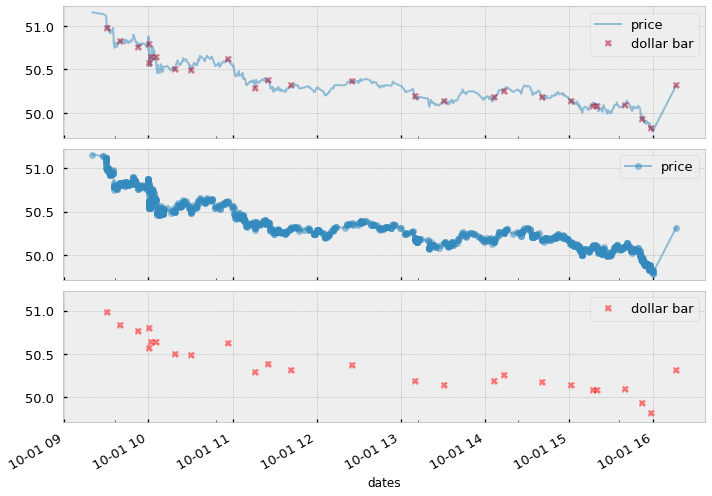

In [27]:
xDate = '2009-10-1'
xdf, xtdf = select_sample_data(df, dv_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

plot_sample_data(xdf, xtdf, 'dollar bar', alpha=0.5, markersize=7)  